# Fundamental ML models for regression

This notebook is identical to the previous one with only one difference: we are using a much smaller train dataset.

### Load the Dataset
 
First, we load the dataset.


In [1]:
from chelo import DatasetRegistry
dataset = DatasetRegistry.get_dataset("VLEDataset", selected_targets=['p_vap'])
dataset.load_data()
X, y = dataset.to_numpy()
y = y.ravel()

### Scale and preprocess the data

Machine learning models often perform better when data is scaled, especially algorithms  which are sensitive to the magnitude of input features.

Scaling ensures all features contribute equally to the model and prevents algorithms from being biased toward features with larger numerical ranges.
Note that for regression it is often beneficial to scale both targets and inputs.

Furthermore, before we train the models, we split the data into training and test sets.






In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


# Normalize the training data and apply the same scaling to the test data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit on training data
X_train_normalized = scaler_X.fit_transform(X_train)
y_train_normalized = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Transform test data using the same scaler
X_test_normalized = scaler_X.transform(X_test)
y_test_normalized = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

print(f"First 5 rows of normalized X_train:\n{X_train_normalized[:5]}")
print(f"First 5 values of normalized y_train:\n{y_train_normalized[:5]}")

Training set size: 11, Test set size: 46
First 5 rows of normalized X_train:
[[0.06378088]
 [0.31928749]
 [0.23405478]
 [1.        ]
 [0.27657537]]
First 5 values of normalized y_train:
[0.03404723 0.21270364 0.14827018 1.         0.17975471]


Note that we need to separately scale the train and test set!

### ML models

Let's start by training a linear regression model (more on this later):

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_normalized, y_train_normalized)

# Evaluate performance
preds = linear_model.predict(X_test_normalized).reshape(-1, 1)
linear_test_predictions = scaler_y.inverse_transform(preds).ravel()
linear_mse = mean_squared_error(y_test, linear_test_predictions)
print(f"Linear Regression MSE: {linear_mse:.4f}")

Linear Regression MSE: 99821.4460


In [4]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_normalized, y_train_normalized)

# Evaluate performance
tree_test_predictions = scaler_y.inverse_transform(tree_model.predict(X_test_normalized).reshape(-1, 1)).ravel()
tree_mse = mean_squared_error(y_test, tree_test_predictions)
print(f"Decision Tree MSE: {tree_mse:.4f}")

Decision Tree MSE: 78179.1739


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_normalized, y_train_normalized)


# Evaluate performance
rf_test_predictions = scaler_y.inverse_transform(rf_model.predict(X_test_normalized).reshape(-1, 1)).ravel()
rf_mse = mean_squared_error(y_test, rf_test_predictions)
print(f"Random Forest MSE: {rf_mse:.4f}")


Random Forest MSE: 48528.9539


In [6]:
from sklearn.neighbors import KNeighborsRegressor

# Train KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_normalized, y_train_normalized)

# Evaluate performance
knn_test_predictions = scaler_y.inverse_transform(knn_model.predict(X_test_normalized).reshape(-1, 1)).ravel()
knn_mse = mean_squared_error(y_test, knn_test_predictions)
print(f"KNN MSE: {knn_mse:.4f}")


KNN MSE: 394231.1113


Let's create some predictions over a range and see how models perform:

In [7]:
import numpy as np

temperature_range = np.linspace(-30, 30, 100).reshape(-1, 1)
temperature_range_normalized = scaler_X.transform(temperature_range)

linear_predictions = linear_model.predict(temperature_range_normalized)
linear_predictions_denormalized = scaler_y.inverse_transform(linear_predictions.reshape(-1, 1)).ravel()

tree_predictions = tree_model.predict(temperature_range_normalized)
tree_predictions_denormalized = scaler_y.inverse_transform(tree_predictions.reshape(-1, 1)).ravel()

rf_predictions = rf_model.predict(temperature_range_normalized)
rf_predictions_denormalized = scaler_y.inverse_transform(rf_predictions.reshape(-1, 1)).ravel()

knn_predictions = knn_model.predict(temperature_range_normalized)
knn_predictions_denormalized = scaler_y.inverse_transform(knn_predictions.reshape(-1, 1)).ravel()



What about a support vector machine?

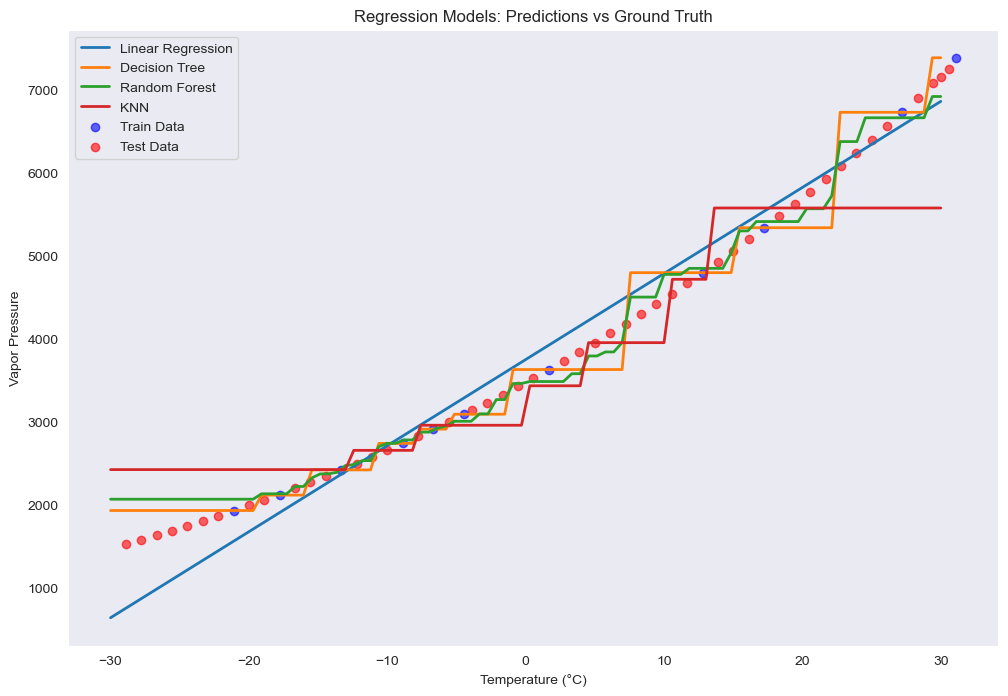

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 8))

# Plot predictions for each model
plt.plot(temperature_range, linear_predictions_denormalized, label="Linear Regression", linewidth=2)
plt.plot(temperature_range, tree_predictions_denormalized, label="Decision Tree", linewidth=2)
plt.plot(temperature_range, rf_predictions_denormalized, label="Random Forest", linewidth=2)
plt.plot(temperature_range, knn_predictions_denormalized, label="KNN", linewidth=2)

# Scatter train and test data
plt.scatter(X_train.ravel(), y_train, color="blue", alpha=0.6, label="Train Data")
plt.scatter(X_test.ravel(), y_test, color="red", alpha=0.6, label="Test Data")
# Add labels, title, and legend
plt.xlabel("Temperature (°C)")
plt.ylabel("Vapor Pressure")
plt.title("Regression Models: Predictions vs Ground Truth")
plt.legend()
plt.grid()
plt.show()

